In [135]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



### 👀 Load dataset


In [136]:
df=pd.read_csv('clean.csv')
print(df.shape)
df.head()

(7485, 8)


,area,room,toilet,lat,long,quan,loai_bds,price-VND
0,100,0,0,16.09512,108.13844,quan-lien-chieu,mua-dat-nen-du-an/,0
1,100,0,0,16.10610,108.13558,quan-lien-chieu,mua-dat-nen-du-an/,0
2,120,4,5,16.07079,108.22511,quan-hai-chau,mua-nha-mat-tien-pho/,100000
3,120,4,6,16.03346,108.23031,quan-hai-chau,mua-nha-biet-thu-lien-ke/,100000
4,81,7,7,16.05685,108.24449,quan-son-tra,mua-nha-mat-tien-pho/,105000


### 🎨 Convert categorical features to numeric type


#### check categorical feature

In [137]:
unique_quan = df['quan'].unique()
print(unique_quan)
unique_loai_bds = df['loai_bds'].unique()
print(unique_loai_bds)

['quan-lien-chieu' 'quan-hai-chau' 'quan-son-tra' 'quan-cam-le'
 'quan-thanh-khe' 'quan-ngu-hanh-son' 'huyen-hoa-vang']
['mua-dat-nen-du-an/' 'mua-nha-mat-tien-pho/' 'mua-nha-biet-thu-lien-ke/'
 'mua-can-ho-chung-cu/' 'mua-dat-tho-cu/' 'mua-nha-hem-ngo/'
 'mua-can-ho-dich-vu/' 'mua-mat-bang-cua-hang-shop-nhieu-muc-dich/'
 'mua-duong-noi-bo/' 'mua-can-ho-tap-the-cu-xa/'
 'mua-mat-bang-cua-hang-shop-cafe-do-uong/' 'mua-can-ho-penthouse/'
 'mua-dat-kho-xuong/' 'mua-dat-nong-nghiep/'
 'mua-cua-hang-shop-shophouse/' 'mua-dat/' 'mua-can-ho-officetel/']


#### convert

In [138]:
df['quan-code'] = pd.Categorical(df['quan'])
print(df['quan-code'].cat.categories)
df['quan-code'] = df['quan-code'].cat.codes
df['loai_bds-code'] = pd.Categorical(df['loai_bds'])
print(df['loai_bds-code'].cat.categories)
df['loai_bds-code'] = df['loai_bds-code'].cat.codes
df.drop(['loai_bds', 'quan'], axis=1, inplace=True)

Index(['huyen-hoa-vang', 'quan-cam-le', 'quan-hai-chau', 'quan-lien-chieu',
       'quan-ngu-hanh-son', 'quan-son-tra', 'quan-thanh-khe'],
      dtype='object')
Index(['mua-can-ho-chung-cu/', 'mua-can-ho-dich-vu/', 'mua-can-ho-officetel/',
       'mua-can-ho-penthouse/', 'mua-can-ho-tap-the-cu-xa/',
       'mua-cua-hang-shop-shophouse/', 'mua-dat-kho-xuong/',
       'mua-dat-nen-du-an/', 'mua-dat-nong-nghiep/', 'mua-dat-tho-cu/',
       'mua-dat/', 'mua-duong-noi-bo/',
       'mua-mat-bang-cua-hang-shop-cafe-do-uong/',
       'mua-mat-bang-cua-hang-shop-nhieu-muc-dich/',
       'mua-nha-biet-thu-lien-ke/', 'mua-nha-hem-ngo/',
       'mua-nha-mat-tien-pho/'],
      dtype='object')


#### create feature price-per-m2 to handle outlier

In [139]:
df['price-per-m2'] = df['price-VND']/df['area']
df['price-per-m2'] = df['price-per-m2'].astype(np.int64)


In [140]:
print(df.shape)
df.describe()

(7485, 9)


,area,room,toilet,lat,long,price-VND,quan-code,loai_bds-code,price-per-m2
count,7.485000e+03,7485.000000,7485.000000,7485.000000,7485.000000,7.485000e+03,7485.000000,7485.000000,7.485000e+03
mean,1.612718e+03,2.401470,2.245291,16.054379,108.188245,6.326358e+10,3.485905,12.701002,1.752629e+08
std,1.271571e+05,4.240193,4.254303,0.265508,2.141420,3.943222e+12,1.643288,4.877232,2.603459e+09
min,1.000000e+00,0.000000,0.000000,15.951100,-77.031960,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,6.800000e+01,0.000000,0.000000,16.036920,108.196790,2.950000e+09,2.000000,9.000000,3.816667e+07
50%,9.000000e+01,2.000000,2.000000,16.055190,108.217690,4.700000e+09,4.000000,15.000000,5.940000e+07
75%,1.190000e+02,3.000000,3.000000,16.071460,108.237580,8.900000e+09,5.000000,16.000000,8.600000e+07
max,1.100000e+07,100.000000,100.000000,38.890370,108.296600,3.404500e+14,6.000000,16.000000,9.800000e+10


### ✂️ Split Train-Test dataset

In [141]:

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.25, random_state=1)
print(data_train.isna().sum())

area             0
room             0
toilet           0
lat              0
long             0
price-VND        0
quan-code        0
loai_bds-code    0
price-per-m2     0
dtype: int64


### 🔍 Check out data distribution of data_train

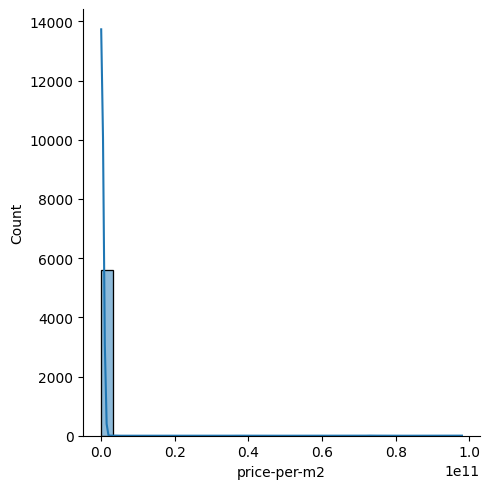

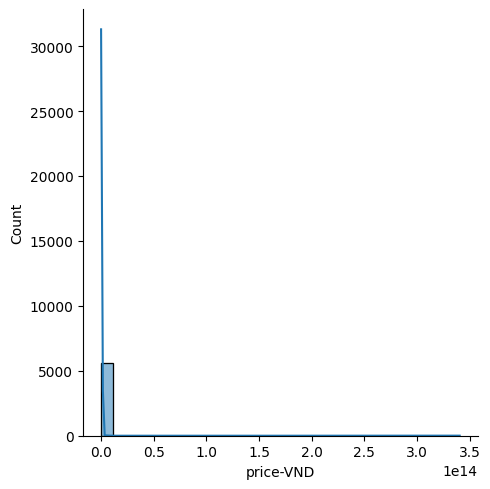

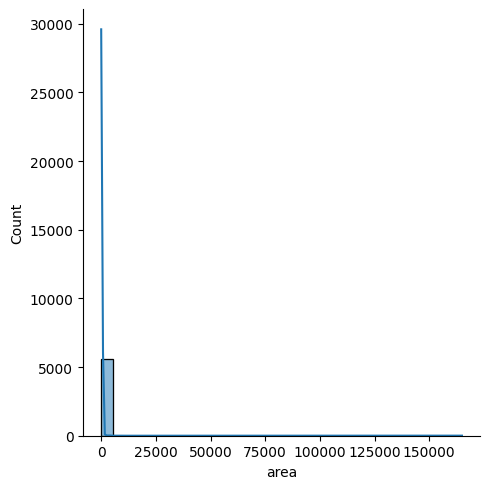

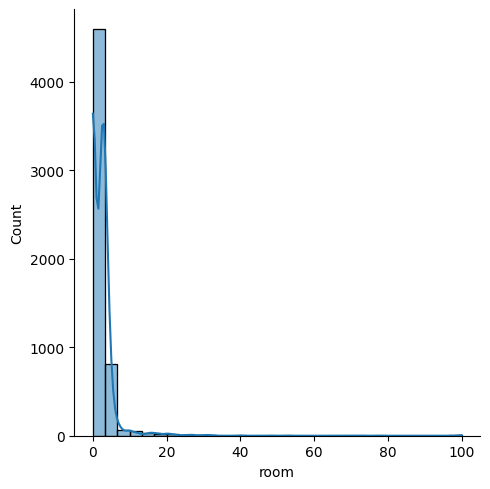

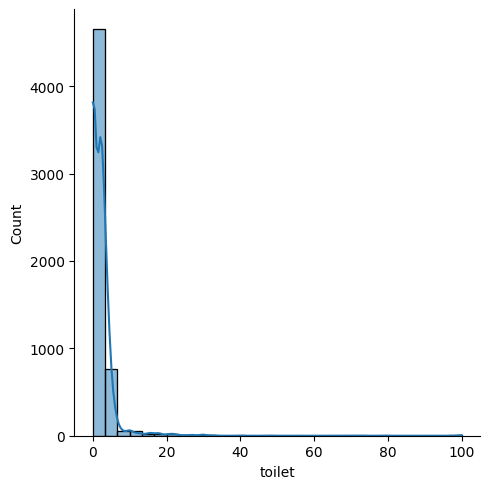

In [142]:
columns = ['price-per-m2','price-VND', 'area', 'room', 'toilet']
for col in columns:
    sns.displot(data_train[col],kde=True,bins=30)
    plt.show()

All features have **skewed** distribution, use **IQR** to find the upper and lower bounds

### 🧹 Outlier processing using IQR

In [143]:
import numpy as np

def outliers_iqr_Train(column):
  q1, q3 = np.percentile(data_train[column], [25, 75])
  iqr = q3 - q1
  lower_bridge = q1 - (iqr * 1.5)
  upper_bridge = q3 + (iqr * 1.5)
  df = data_train[data_train[column] >= lower_bridge]
  df = df[df[column] <= upper_bridge]
  return df

def outliers_iqr_Test(column):
  q1, q3 = np.percentile(data_test[column], [25, 75])
  iqr = q3 - q1
  lower_bridge = q1 - (iqr * 1.5)
  upper_bridge = q3 + (iqr * 1.5)
  df = data_test[data_test[column] >= lower_bridge]
  df = df[df[column] <= upper_bridge]
  return df

columns = ['price-per-m2', 'area', 'room', 'toilet']
for col in columns:
    data_train = outliers_iqr_Train(col)
    data_test = outliers_iqr_Test(col)



### 🔍 Check out data distribution of data_train again

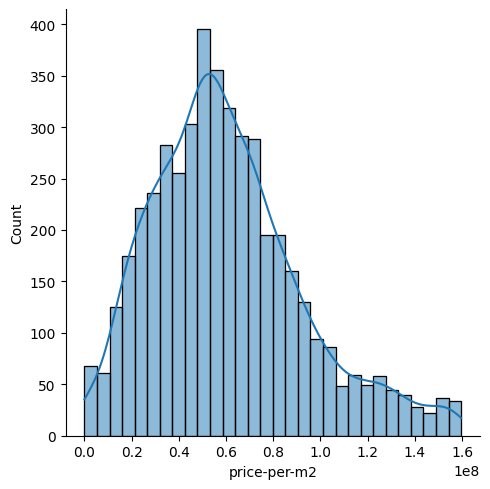

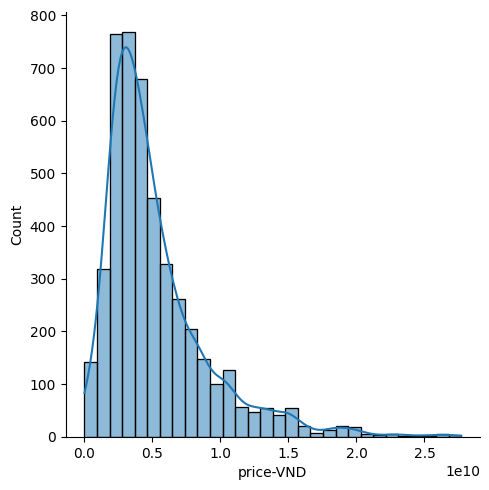

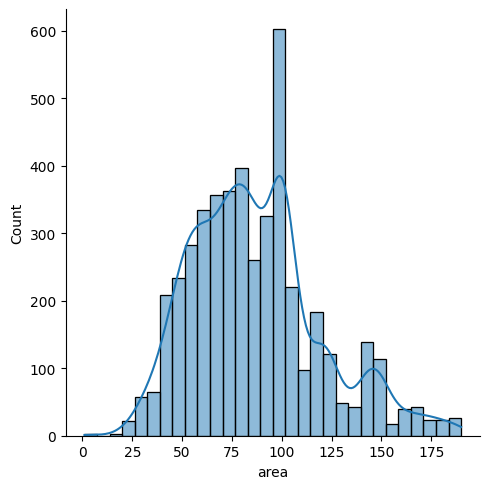

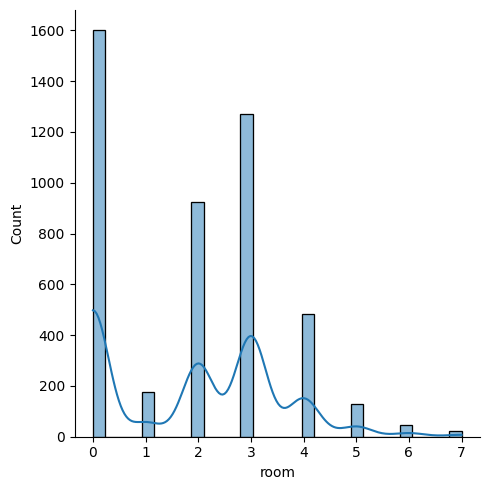

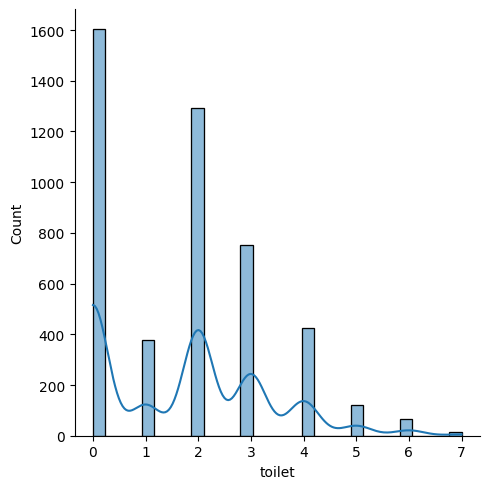

In [144]:
columns = ['price-per-m2','price-VND', 'area', 'room', 'toilet']
for col in columns:
    sns.displot(data_train[col],kde=True,bins=30)
    plt.show()




In [145]:
print(data_train.shape)
print(data_test.shape)
print(data_train.isna().sum())
print(data_test.isna().sum())

(4654, 9)
(1540, 9)
area             0
room             0
toilet           0
lat              0
long             0
price-VND        0
quan-code        0
loai_bds-code    0
price-per-m2     0
dtype: int64
area             0
room             0
toilet           0
lat              0
long             0
price-VND        0
quan-code        0
loai_bds-code    0
price-per-m2     0
dtype: int64


### 🔨 Normalize the data with z-score
🔖 Rescale the data so that this feature values are centered around 0


In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns = ['area', 'room', 'toilet','lat','long']

data_train[columns] = scaler.fit_transform(data_train[columns])
data_test[columns] = scaler.transform(data_test[columns])

### Feature selection


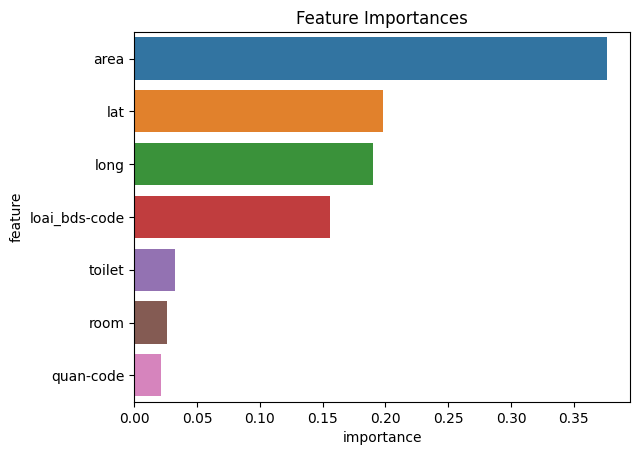

In [147]:
data_train.drop(['price-per-m2'], axis=1, inplace=True)
data_test.drop(['price-per-m2'], axis=1, inplace=True)
from sklearn.ensemble import RandomForestRegressor
x = data_train.drop('price-VND', axis=1)
y = data_train['price-VND'].astype(np.int64)

# Fit RandomForest model
rf = RandomForestRegressor()
rf.fit(x, y)

# lấy đặc trưng quan trọng
importances = pd.DataFrame({'feature': x.columns, 'importance': rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)

# Plot
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importances')
plt.show()

#### remove the least importance feature

In [148]:
data_train_save = data_train.drop(['quan-code'], axis=1)
data_test_save = data_test.drop(['quan-code'], axis=1)

In [149]:
print(data_train_save.shape)
print(data_test_save.shape)

(4654, 7)
(1540, 7)


### 📝 Export data to csv

In [150]:
data_train_save.to_csv('train_data.csv', index=False)
data_test_save.to_csv('test_data.csv', index=False)
df.to_csv('data.csv', index=False)

In [151]:
print(data_train_save.describe())
print(data_test_save.describe())

               area          room        toilet           lat          long  \
count  4.654000e+03  4.654000e+03  4.654000e+03  4.654000e+03  4.654000e+03   
mean  -1.725211e-16 -1.374062e-17  2.213767e-17  2.177583e-14 -9.084535e-14   
std    1.000107e+00  1.000107e+00  1.000107e+00  1.000107e+00  1.000107e+00   
min   -2.655216e+00 -1.173896e+00 -1.101304e+00 -3.521404e+00 -3.796252e+00   
25%   -7.722321e-01 -1.173896e+00 -1.101304e+00 -4.953611e-01 -6.251097e-01   
50%   -1.239917e-01  5.963571e-02  1.743229e-01  1.377596e-01  1.758795e-01   
75%    4.007743e-01  6.764015e-01  8.121362e-01  7.185010e-01  7.327904e-01   
max    3.178947e+00  3.143465e+00  3.363390e+00  3.893596e+00  2.668540e+00   

          price-VND  loai_bds-code  
count  4.654000e+03    4654.000000  
mean   5.220440e+09      12.525140  
std    3.834071e+09       5.064988  
min    0.000000e+00       0.000000  
25%    2.700000e+09       9.000000  
50%    4.150000e+09      15.000000  
75%    6.500000e+09      16.0